In [1]:
import DSGRN
import DSGRN_utils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
import os
import json
import time
from multiprocessing import cpu_count


In [2]:
from dsgrn_boolean.utils.hill_analysis import analyze_hill_coefficients
from dsgrn_boolean.utils.newton import newton_method
from dsgrn_boolean.utils.dsgrn_sample_to_matrix import extract_parameter_matrices
from dsgrn_boolean.utils.nullclines import plot_nullclines
from dsgrn_boolean.utils.interactive import plot_nullclines_interactive

from dsgrn_boolean.utils.sample_management import load_samples
from dsgrn_boolean.utils.dsgrn_sample_to_matrix import extract_parameter_matrices
from dsgrn_boolean.models.hill import HillFunction, hill

from dsgrn_boolean.utils.sample_management import load_samples

ModuleNotFoundError: No module named 'dsgrn_boolean'

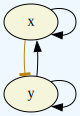

Number of parameter nodes: 196


In [3]:
net_spec = """x : x + y : E
              y : (~x) y : E"""

network = DSGRN.Network(net_spec)

G = DSGRN.DrawGraph(network)
display(G)

parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameter nodes:', parameter_graph.size())


In [4]:
par_list = [0, 49, 98, 147]

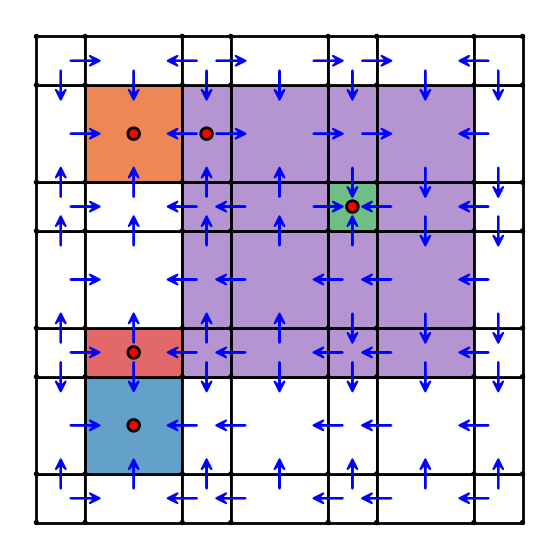

In [5]:
par_index = 98

parameter = parameter_graph.parameter(par_index)

# sampler = DSGRN.ParameterSampler(network)
# n_samples = 10000
samples = load_samples(par_index,filtered=True,filter_tol=0.1)
# samples = load_samples(par_index,filtered=True,filter_tol=1.0)

morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)
DSGRN_utils.PlotMorseSets(morse_graph, stg, graded_complex)

In [6]:
parameter.inequalities()

'{ "inequalities" : "(L[x->x] + L[y->x]) < T[x->x] && (U[x->x] + L[y->x]) < T[x->x] && (L[x->x] + U[y->x]) < T[x->x] && T[x->y] < (U[x->x] + U[y->x]) && 0 < T[x->x] < T[x->y] && 0 < L[x->x] < U[x->x] && 0 < L[y->x] < U[y->x] && L[x->y] L[y->y] < T[y->y] && U[x->y] L[y->y] < T[y->y] && L[x->y] U[y->y] < T[y->y] && T[y->x] < U[x->y] U[y->y] && 0 < T[y->y] < T[y->x] && 0 < L[x->y] < U[x->y] && 0 < L[y->y] < U[y->y]", "variables" : "{L[x->x], L[y->x], U[x->x], U[y->x], T[x->x], T[x->y], L[x->y], L[y->y], U[x->y], U[y->y], T[y->y], T[y->x]}"}'

In [7]:
par_sample = samples[9]
L, U, T = extract_parameter_matrices(par_sample, network)
d = 1000
plot_nullclines_interactive(L, U, T, d)

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='d:', max=1000.0, min=1.0, s…

In [8]:
import os
os.cpu_count()

16

In [9]:
print('L=',L)
print('U=',U)
print('T=',T)



L= [[0.3746714  0.20296066]
 [0.05512928 0.24878847]]
U= [[2.71256532 1.72363608]
 [0.79370077 1.97383903]]
T= [[2.8074492  2.95732696]
 [0.82134676 0.43581056]]


In [10]:
# Expected number of equilibria
expected_eq = len(DSGRN.EquilibriumCells(parameter))
print("expected_equilibria = ", expected_eq)

expected_equilibria =  5


In [11]:
def check_inequalities(L, U, T):
    inequalities = [
        (L[0, 0] + L[1, 0] < T[0, 0]),
        (U[0, 0] + L[1, 0] < T[0, 0]),
        (L[0, 0] + U[1, 0] < T[0, 0]),
        (T[0, 1] < U[0, 0] + U[1, 0]),
        (0 < T[0, 0] < T[0, 1]),
        (0 < L[0, 0] < U[0, 0]),
        (0 < L[1, 0] < U[1, 0]),
        (L[0, 1] * L[1, 1] < T[1, 1]),
        (U[0, 1] * L[1, 1] < T[1, 1]),
        (L[0, 1] * U[1, 1] < T[1, 1]),
        (T[1, 0] < U[0, 1] * U[1, 1]),
        (0 < T[1, 1] < T[1, 0]),
        (0 < L[0, 1] < U[0, 1]),
        (0 < L[1, 1] < U[1, 1]),
    ]

    results = {}
    for i, inequality in enumerate(inequalities):
        results[f"Inequality {i+1}"] = inequality

    return results

results = check_inequalities(L, U, T)
for inequality, result in results.items():
    print(f"{inequality}: {result}")

Inequality 1: True
Inequality 2: True
Inequality 3: True
Inequality 4: True
Inequality 5: True
Inequality 6: True
Inequality 7: True
Inequality 8: True
Inequality 9: True
Inequality 10: True
Inequality 11: True
Inequality 12: True
Inequality 13: True
Inequality 14: True


In [12]:
# TO-DO
# search just for the three stable points 
# pull the # from the level = 0 (morse set)
# for each point, look up just the grid corresponding to that morse-set

In [13]:
# d_range = range(200,201)

In [14]:
# # Let's do a few less samples lol 
# # samples_1000 = samples[:1000]
# # samples = samples[:1000]
# samples_100 = samples[:100]
# samples = samples_100

# # Use your pre-generated samples with sample tracking
# results, summary, optimal_d, sample_results = analyze_hill_coefficients(
#     network, 
#     parameter, 
#     samples, 
#     d_range
# )

# print(f"\nSummary:")
# print(f"Expected equilibria: {summary['expected_equilibria']}")
# print(f"Best match percentage: {summary['best_match']:.1f}% at d = {summary['best_match_d']}")
# print(f"Worst match percentage: {summary['worst_match']:.1f}% at d = {summary['worst_match_d']}")

In [15]:
# # Example: Check which samples matched at a specific d value
# d = 200  # Adjust this value based on your d_range
# print(f"\nAt d={d}:")
# print(f"Matching samples: {sample_results[d]['matches']}")
# print(f"Failed samples: {sample_results[d]['failures']}")

In [16]:
# # Example: Track a specific sample across all d values
# sample_id = sample_results[d]['failures'][0]  # You can change this to track different samples
# print(f"\nTracking sample {sample_id}:")
# matching_d = [d for d in d_range if sample_id in sample_results[d]['matches']]
# failing_d = [d for d in d_range if sample_id in sample_results[d]['failures']]
# print(f"Matching d values: {matching_d}")
# print(f"Failing d values: {failing_d}")

In [17]:
# par_sample = samples[sample_id]
# L, U, T = extract_parameter_matrices(par_sample, network)
# plot_nullclines_interactive(L, U, T, d)

In [18]:
# from dsgrn_boolean.utils.hill_stable_analysis import analyze_stability
# from dsgrn_boolean.utils.sample_management import load_samples

# # Load samples
# par_index = 98
# samples = load_samples(par_index)[:10]  # First 10 samples

# # Run analysis
# results = analyze_stability(
#     network, 
#     parameter,
#     samples,
#     d_range=range(100, 0, -5)  # Step by 5 for testing
# )